<a href="https://colab.research.google.com/github/al00pes/dengue_riodejaneiro/blob/main/Projeto_dengue_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise Epidemiológica da Dengue

Este projeto visa analisar dados semanais de casos de dengue em diferentes cidades, utilizando um modelo nowcasting. Os dados são fornecidos por várias fontes e agregados semanalmente, permitindo uma avaliação detalhada da situação epidemiológica em diferentes localidades. Além disso, o projeto inclui a plotagem de gráficos que mostram a média de casos e a média de casos estimados.
Nesse projeto consumi dados da API de 6 cidades do Estado do Rio de janeiro.

## Dicionário dos Dados

Os dados contêm várias colunas importantes, que são descritas a seguir:

- **data_iniSE**: Primeiro dia da semana epidemiológica (domingo).
- **SE**: Semana epidemiológica.
- **casos_est**: Número estimado de casos por semana utilizando o modelo nowcasting (os valores são atualizados retrospectivamente todas as semanas).
- **casos_est_min** e **casos_est_max**: Intervalo de credibilidade de 95% do número estimado de casos.
- **casos**: Número de casos notificados por semana (os valores são atualizados retrospectivamente todas as semanas).
- **p_rt1**: Probabilidade de \(Rt > 1\). Para emissão do alerta laranja, utilizamos o critério \(p\_rt1 > 0,95\) por três semanas ou mais.
- **p_inc100k**: Taxa de incidência estimada por 100 mil habitantes.
- **Localidade_id**: Divisão submunicipal (atualmente implementada apenas no Rio de Janeiro).
- **nivel**: Nível de alerta (1 = verde, 2 = amarelo, 3 = laranja, 4 = vermelho).
- **id**: Índice numérico.
- **versao_modelo**: Versão do modelo (uso interno).
- **Rt**: Estimativa pontual do número reprodutivo de casos.
- **pop**: População estimada (IBGE).
- **tempmin**: Média das temperaturas mínimas diárias ao longo da semana.
- **umidmax**: Média da umidade relativa do ar máxima diária ao longo da semana.
- **receptivo**: Indica receptividade climática, ou seja, condições para alta capacidade vetorial. 0 = desfavorável, 1 = favorável, 2 = favorável nesta semana e na semana passada, 3 = favorável durante pelo menos três semanas (suficiente para completar um ciclo de transmissão).
- **transmissão**: Evidência de transmissão sustentada: 0 = nenhuma evidência, 1 = possível, 2 = provável, 3 = altamente provável.
- **nivel_inc**: Incidência estimada abaixo do limiar pré-epidêmico, 1 = acima do limiar pré-epidêmico, mas abaixo do limiar epidêmico, 2 = acima do limiar epidêmico.
- **notif_accum_year**: Número acumulado de casos por ano.

## API DENGUE

As tabelas do Infodengue contêm dados agregados por semana, fornecidos por diferentes fontes. Esses dados podem ser consultados por meio de um formulário ou diretamente do Python, via consulta de uma API. Esta funcionalidade está disponível através da URL:

```
https://info.dengue.mat.br/api/alertcity?params
```

### Parâmetros Necessários para a API

- **geocode**: Código IBGE da cidade.
- **disease**: Tipo de doença a ser consultada (`str:dengue|chikungunya|zika`).
- **format**: Extensão/formato do arquivo (`str:json|csv`).
- **ew_start**: Semana epidemiológica inicial da consulta (`int:1-53`).
- **ew_end**: Semana epidemiológica final da consulta (`int:1-53`).
- **ey_start**: Ano inicial da consulta (`int:0-9999`).
- **ey_end**: Ano final da consulta (`int:0-9999`).



In [2]:
#Importando a biblioteca
import pandas as pd
import numpy as np
# Importação de pacotes
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
#import mysql.connector
#from mysql.connector import Error
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Consumunindo API -  Cidade Rio de Janeiro

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3304557 # Rio de Janeiro
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start="
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"
)

url_resp = "?".join([url, params])

#Transformando o dataset em um dataframe
df_rio = pd.read_csv(url_resp, index_col='SE')

#Criando uma nova coluna vinculando a cidade
#Assim cada consumo da API ja vai identificada

#Rio de Janeiro
df_rio['cidade'] = 3304557

#Exibindo o dataframe
df_rio.head()

#url_resp

,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,id,...,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,cidade
SE,,,,,,,,,,,,,,,,,,,,,
202422,2024-05-26,596.5,314,1449.0,141,0.000000e+00,9.002620,0,4,330455720242219877,...,80.489304,20.742857,21.142857,NaN,NaN,NaN,NaN,NaN,346831,3304557
202421,2024-05-19,1128.0,1007,1356.0,894,0.000000e+00,17.024233,0,4,330455720242119877,...,78.026522,23.713043,24.086957,NaN,NaN,NaN,NaN,NaN,346831,3304557
202420,2024-05-12,1558.0,1493,1679.0,1404,8.261883e-09,23.513968,0,4,330455720242019877,...,77.588450,24.071429,24.428571,NaN,NaN,NaN,NaN,NaN,346831,3304557
202419,2024-05-05,1828.0,1780,1911.0,1710,1.258717e-06,27.588917,0,4,330455720241919877,...,73.139044,24.840000,25.350000,NaN,NaN,NaN,NaN,NaN,346831,3304557
202418,2024-04-28,1880.0,1841,1943.0,1788,0.000000e+00,28.373722,0,4,330455720241819877,...,75.147314,25.600000,26.000000,NaN,NaN,NaN,NaN,NaN,346831,3304557


In [4]:
df_rio.shape

(596, 30)

In [5]:
# Consumunindo API - Duque de Caxias

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3301702 # Duque de Caxias
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start="
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"
)

url_resp_dqc = "?".join([url, params])

#Transformando o dataset em um dataframe
df_caxias = pd.read_csv(url_resp_dqc, index_col='SE')

#Adicionando nova coluna

#Duque de Caxias
df_caxias['cidade'] = 3301702

#Exibindo o dataframe

df_caxias.head()
#url_resp

,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,id,...,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,cidade
SE,,,,,,,,,,,,,,,,,,,,,
202422,2024-05-26,15.0,2,67,0,4.757780e-05,1.916201,0,1,330170220242219877,...,80.489304,20.742857,21.142857,NaN,NaN,NaN,NaN,NaN,21555,3301702
202421,2024-05-19,18.0,4,69,1,2.622818e-08,2.299441,0,4,330170220242119877,...,78.026522,23.713043,24.086957,NaN,NaN,NaN,NaN,NaN,21555,3301702
202420,2024-05-12,46.0,33,80,30,2.988277e-06,5.876349,0,4,330170220242019877,...,77.588450,24.071429,24.428571,NaN,NaN,NaN,NaN,NaN,21555,3301702
202419,2024-05-05,65.0,53,100,50,6.024645e-10,8.303536,0,4,330170220241919877,...,73.139044,24.840000,25.350000,NaN,NaN,NaN,NaN,NaN,21555,3301702
202418,2024-04-28,77.0,66,107,63,1.110223e-16,9.836497,0,4,330170220241819877,...,75.147314,25.600000,26.000000,NaN,NaN,NaN,NaN,NaN,21555,3301702


In [6]:
# Consumunindo API - São João de Meriti

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3305109 # São João de Meriti
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start="
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"
)

url_resp_sjm = "?".join([url, params])
#url_resp

#Transformando o dataset em um dataframe
df_sjm = pd.read_csv(url_resp_sjm, index_col='SE')

#Adicionando nova coluna

#São João de Meriti
df_sjm['cidade'] = 3305109

# Exibindo do dataframe
df_sjm.head()

,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,id,...,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,cidade
SE,,,,,,,,,,,,,,,,,,,,,
202422,2024-05-26,34.0,3,249,0,0.030844,8.634417,0,4,330510920242219877,...,80.489304,20.742857,21.142857,NaN,NaN,NaN,NaN,NaN,9857,3305109
202421,2024-05-19,47.0,20,217,17,0.045911,11.935811,0,4,330510920242119877,...,78.026522,23.713043,24.086957,NaN,NaN,NaN,NaN,NaN,9857,3305109
202420,2024-05-12,43.5,24,122,22,0.000288,11.046974,0,4,330510920242019877,...,77.588450,24.071429,24.428571,NaN,NaN,NaN,NaN,NaN,9857,3305109
202419,2024-05-05,64.0,49,124,48,0.001014,16.253020,0,4,330510920241919877,...,73.139044,24.840000,25.350000,NaN,NaN,NaN,NaN,NaN,9857,3305109
202418,2024-04-28,86.0,75,134,74,0.000622,21.839994,0,4,330510920241819877,...,75.147314,25.600000,26.000000,NaN,NaN,NaN,NaN,NaN,9857,3305109


In [7]:
# Consumunindo API - Niteroi

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3303302 # Niteroi
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start="
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"
)

url_resp_nit = "?".join([url, params])
#url_resp

#Transformando o dataset em um dataframe
df_niteroi = pd.read_csv(url_resp_nit, index_col='SE')

#Adicionando uma nova coluna

#Niteroi
df_niteroi['cidade'] = 3303302

#Exibindo o dataframe

df_niteroi.head()

,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,id,...,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,cidade
SE,,,,,,,,,,,,,,,,,,,,,
202422,2024-05-26,72.0,13,362,0,0.396718,13.749274,0,1,330330220242219877,...,80.489304,20.742857,21.142857,NaN,NaN,NaN,NaN,NaN,26213,3303302
202421,2024-05-19,75.0,25,268,12,0.563496,14.322161,0,2,330330220242119877,...,78.026522,23.713043,24.086957,NaN,NaN,NaN,NaN,NaN,26213,3303302
202420,2024-05-12,76.0,39,194,27,0.716796,14.513123,0,2,330330220242019877,...,77.588450,24.071429,24.428571,NaN,NaN,NaN,NaN,NaN,26213,3303302
202419,2024-05-05,79.0,52,152,45,0.683052,15.086009,0,2,330330220241919877,...,73.139044,24.840000,25.350000,NaN,NaN,NaN,NaN,NaN,26213,3303302
202418,2024-04-28,63.0,43,120,38,0.014545,12.030615,0,2,330330220241819877,...,75.147314,25.600000,26.000000,NaN,NaN,NaN,NaN,NaN,26213,3303302


In [8]:
'''# Consumunindo API - Nova Iguaçu

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3303500 # Nova Iguaçu
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start="
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"
)

url_resp_nvi = "?".join([url, params])

#Transformando o dataset em dataframe
df_nova_iguacu = pd.read_csv(url_resp_nvi, index_col='SE')

#Adicionando uma nova coluna
#Nova iguacu
df_nova_iguacu['cidade'] = 4

#url_resp'''

'# Consumunindo API - Nova Iguaçu\n\nurl = "https://info.dengue.mat.br/api/alertcity"\ngeocode = 3303500 # Nova Iguaçu\ndisease = "dengue"\nformat = "csv"\new_start = 1\new_end = 53\ney_start = 2013\ney_end = 2024\n\nparams =(\n    "&disease="\n    + f"{disease}"\n    + "&geocode="\n    + f"{geocode}"\n    + "&disease="\n    + f"{disease}"\n    + "&format="\n    + f"{format}"\n    + "&ew_start="\n    + f"{ew_start}"\n    + "&ew_end="\n    + f"{ew_end}"\n    + "&ey_start="\n    + f"{ey_start}"\n    + "&ey_end="\n    + f"{ey_end}"\n)\n\nurl_resp_nvi = "?".join([url, params])\n\n#Transformando o dataset em dataframe\ndf_nova_iguacu = pd.read_csv(url_resp_nvi, index_col=\'SE\')\n\n#Adicionando uma nova coluna\n#Nova iguacu\ndf_nova_iguacu[\'cidade\'] = 4\n\n#url_resp'

In [9]:
# Consumunindo API - Petropolis

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3303906 # Petropolis
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start="
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"
)

url_resp_ptr = "?".join([url, params])

#Transformando o dataset em dataframe
df_petropolis = pd.read_csv(url_resp_ptr, index_col='SE')

#Adicionando uma novo coluna
#'Nilopolis'
df_petropolis['cidade'] = 3303906

#Exibindo o dataframe
df_petropolis.head()

#url_resp


,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,id,...,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,cidade
SE,,,,,,,,,,,,,,,,,,,,,
202422,2024-05-26,18.0,2,163,0,3.341413e-09,5.906326,0,1,330390620242219877,...,80.489304,20.742857,21.142857,NaN,NaN,NaN,NaN,NaN,11624,3303906
202421,2024-05-19,32.0,4,212,0,2.220446e-16,10.500134,0,2,330390620242119877,...,78.026522,23.713043,24.086957,NaN,NaN,NaN,NaN,NaN,11624,3303906
202420,2024-05-12,41.0,6,199,0,0.000000e+00,13.453298,0,4,330390620242019877,...,77.588450,24.071429,24.428571,NaN,NaN,NaN,NaN,NaN,11624,3303906
202419,2024-05-05,137.0,95,303,86,8.537615e-14,44.953700,0,4,330390620241919877,...,73.139044,24.840000,25.350000,NaN,NaN,NaN,NaN,NaN,11624,3303906
202418,2024-04-28,202.5,158,367,147,1.632028e-14,66.446170,0,4,330390620241819877,...,75.147314,25.600000,26.000000,NaN,NaN,NaN,NaN,NaN,11624,3303906


In [10]:
# Consumunindo API - Teresopolis

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3305802 # Teresopolis
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start="
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"
)

url_resp_trs = "?".join([url, params])

#Transformando o dataset em dataframe
df_teresopolis = pd.read_csv(url_resp_trs, index_col='SE')

#Adicionando uma novo coluna
#'Nilopolis'
df_teresopolis['cidade'] = 3305802

#Exibindo o dataframe
df_teresopolis.head()

#url_resp


,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,id,...,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,cidade
SE,,,,,,,,,,,,,,,,,,,,,
202422,2024-05-26,100.0,6,1095,1,0.010795,52.899975,0,4,330580220242219877,...,80.489304,20.742857,21.142857,NaN,NaN,NaN,NaN,NaN,3059,3305802
202421,2024-05-19,93.0,48,545,43,0.000116,49.196980,0,4,330580220242119877,...,78.026522,23.713043,24.086957,NaN,NaN,NaN,NaN,NaN,3059,3305802
202420,2024-05-12,158.0,134,313,131,0.618007,83.581960,0,4,330580220242019877,...,77.588450,24.071429,24.428571,NaN,NaN,NaN,NaN,NaN,3059,3305802
202419,2024-05-05,140.0,126,199,125,0.414248,74.059970,0,4,330580220241919877,...,73.139044,24.840000,25.350000,NaN,NaN,NaN,NaN,NaN,3059,3305802
202418,2024-04-28,180.0,173,216,173,0.993184,95.219955,0,4,330580220241819877,...,75.147314,25.600000,26.000000,NaN,NaN,NaN,NaN,NaN,3059,3305802


In [11]:
'''# Consumunindo API - Nova Friburgo

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3303401 # Nova Friburgo
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start="
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"
)

url_resp_nlp = "?".join([url, params])

#Transformando o dataset em dataframe
df_novafriburgo = pd.read_csv(url_resp_nlp, index_col='SE')

#Adicionando uma novo coluna
#'Nilopolis'
df_novafriburgo['cidade'] = 8

#Exibindo o dataframe
df_novafriburgo.head()

#url_resp'''


'# Consumunindo API - Nova Friburgo\n\nurl = "https://info.dengue.mat.br/api/alertcity"\ngeocode = 3303401 # Nova Friburgo\ndisease = "dengue"\nformat = "csv"\new_start = 1\new_end = 53\ney_start = 2013\ney_end = 2024\n\nparams =(\n    "&disease="\n    + f"{disease}"\n    + "&geocode="\n    + f"{geocode}"\n    + "&disease="\n    + f"{disease}"\n    + "&format="\n    + f"{format}"\n    + "&ew_start="\n    + f"{ew_start}"\n    + "&ew_end="\n    + f"{ew_end}"\n    + "&ey_start="\n    + f"{ey_start}"\n    + "&ey_end="\n    + f"{ey_end}"\n)\n\nurl_resp_nlp = "?".join([url, params])\n\n#Transformando o dataset em dataframe\ndf_novafriburgo = pd.read_csv(url_resp_nlp, index_col=\'SE\')\n\n#Adicionando uma novo coluna\n#\'Nilopolis\'\ndf_novafriburgo[\'cidade\'] = 8\n\n#Exibindo o dataframe\ndf_novafriburgo.head()\n\n#url_resp'

In [12]:
#Concatenando os dataframe em apenas 1

df_dados = pd.concat([df_caxias,df_niteroi,df_rio,df_sjm,df_petropolis,df_teresopolis])

df_dados.to_csv('./dados_brutos.csv', encoding='UTF-8', index=False)

#Exibindo o dataframe

df_dados.head()

,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,id,...,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,cidade
SE,,,,,,,,,,,,,,,,,,,,,
202422,2024-05-26,15.0,2,67.0,0,4.757780e-05,1.916201,0,1,330170220242219877,...,80.489304,20.742857,21.142857,NaN,NaN,NaN,NaN,NaN,21555,3301702
202421,2024-05-19,18.0,4,69.0,1,2.622818e-08,2.299441,0,4,330170220242119877,...,78.026522,23.713043,24.086957,NaN,NaN,NaN,NaN,NaN,21555,3301702
202420,2024-05-12,46.0,33,80.0,30,2.988277e-06,5.876349,0,4,330170220242019877,...,77.588450,24.071429,24.428571,NaN,NaN,NaN,NaN,NaN,21555,3301702
202419,2024-05-05,65.0,53,100.0,50,6.024645e-10,8.303536,0,4,330170220241919877,...,73.139044,24.840000,25.350000,NaN,NaN,NaN,NaN,NaN,21555,3301702
202418,2024-04-28,77.0,66,107.0,63,1.110223e-16,9.836497,0,4,330170220241819877,...,75.147314,25.600000,26.000000,NaN,NaN,NaN,NaN,NaN,21555,3301702


In [13]:
#Verificando a dimensão do dataframe
df_dados.shape

(3576, 30)

In [14]:
#VErificando se possui todas as cidades consumidas
# cada cidade foi especificado com o seu codigo identificado no IBGE

df_dados['cidade'].unique()

array([3301702, 3303302, 3304557, 3305109, 3303906, 3305802])

In [15]:
#Verificando as informações
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3576 entries, 202422 to 201301
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_iniSE        3576 non-null   object 
 1   casos_est         3576 non-null   float64
 2   casos_est_min     3576 non-null   int64  
 3   casos_est_max     3570 non-null   float64
 4   casos             3576 non-null   int64  
 5   p_rt1             3576 non-null   float64
 6   p_inc100k         3576 non-null   float64
 7   Localidade_id     3576 non-null   int64  
 8   nivel             3576 non-null   int64  
 9   id                3576 non-null   int64  
 10  versao_modelo     3576 non-null   object 
 11  tweet             3576 non-null   float64
 12  Rt                3576 non-null   float64
 13  pop               3576 non-null   float64
 14  tempmin           3576 non-null   float64
 15  umidmax           3468 non-null   float64
 16  receptivo         3576 non-null   int64 

In [16]:
#Excluíndo as colunas que estão nulas e que não irei utilizar

df_dados_01 = df_dados.drop(['casprov','casprov_est','casprov_est_min','casprov_est_max','casconf','versao_modelo','id','tweet','Localidade_id'],axis=1)



In [17]:
#Exiindo as informações do novo dataframe
df_dados_01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3576 entries, 202422 to 201301
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_iniSE        3576 non-null   object 
 1   casos_est         3576 non-null   float64
 2   casos_est_min     3576 non-null   int64  
 3   casos_est_max     3570 non-null   float64
 4   casos             3576 non-null   int64  
 5   p_rt1             3576 non-null   float64
 6   p_inc100k         3576 non-null   float64
 7   nivel             3576 non-null   int64  
 8   Rt                3576 non-null   float64
 9   pop               3576 non-null   float64
 10  tempmin           3576 non-null   float64
 11  umidmax           3468 non-null   float64
 12  receptivo         3576 non-null   int64  
 13  transmissao       3576 non-null   int64  
 14  nivel_inc         3576 non-null   int64  
 15  umidmed           3468 non-null   float64
 16  umidmin           3468 non-null   float6

In [18]:
#Verificar os missings que existente

df_dados_01.isnull().sum()

data_iniSE            0
casos_est             0
casos_est_min         0
casos_est_max         6
casos                 0
p_rt1                 0
p_inc100k             0
nivel                 0
Rt                    0
pop                   0
tempmin               0
umidmax             108
receptivo             0
transmissao           0
nivel_inc             0
umidmed             108
umidmin             108
tempmed             108
tempmax             108
notif_accum_year      0
cidade                0
dtype: int64

In [19]:
# Instânciando os dados nulos para trata-los'
df_nulos = df_dados_01[df_dados_01['umidmax'].isna()]

In [20]:
# Duque de caxias
df_nulos[df_nulos['cidade'] == 3301702].isna().sum()

data_iniSE           0
casos_est            0
casos_est_min        0
casos_est_max        0
casos                0
p_rt1                0
p_inc100k            0
nivel                0
Rt                   0
pop                  0
tempmin              0
umidmax             18
receptivo            0
transmissao          0
nivel_inc            0
umidmed             18
umidmin             18
tempmed             18
tempmax             18
notif_accum_year     0
cidade               0
dtype: int64

In [21]:
# Niteroi
df_nulos[df_nulos['cidade'] == 3303302].isna().sum()

data_iniSE           0
casos_est            0
casos_est_min        0
casos_est_max        0
casos                0
p_rt1                0
p_inc100k            0
nivel                0
Rt                   0
pop                  0
tempmin              0
umidmax             18
receptivo            0
transmissao          0
nivel_inc            0
umidmed             18
umidmin             18
tempmed             18
tempmax             18
notif_accum_year     0
cidade               0
dtype: int64

In [22]:
# Rio de Janeiro
df_nulos[df_nulos['cidade'] == 3304557].isna().sum()

data_iniSE           0
casos_est            0
casos_est_min        0
casos_est_max        0
casos                0
p_rt1                0
p_inc100k            0
nivel                0
Rt                   0
pop                  0
tempmin              0
umidmax             18
receptivo            0
transmissao          0
nivel_inc            0
umidmed             18
umidmin             18
tempmed             18
tempmax             18
notif_accum_year     0
cidade               0
dtype: int64

In [23]:
# São João de Meriti
df_nulos[df_nulos['cidade'] == 3305109].isna().sum()

data_iniSE           0
casos_est            0
casos_est_min        0
casos_est_max        0
casos                0
p_rt1                0
p_inc100k            0
nivel                0
Rt                   0
pop                  0
tempmin              0
umidmax             18
receptivo            0
transmissao          0
nivel_inc            0
umidmed             18
umidmin             18
tempmed             18
tempmax             18
notif_accum_year     0
cidade               0
dtype: int64

In [24]:
# Petropolis
df_nulos[df_nulos['cidade'] == 3303906].isna().sum()


data_iniSE           0
casos_est            0
casos_est_min        0
casos_est_max        0
casos                0
p_rt1                0
p_inc100k            0
nivel                0
Rt                   0
pop                  0
tempmin              0
umidmax             18
receptivo            0
transmissao          0
nivel_inc            0
umidmed             18
umidmin             18
tempmed             18
tempmax             18
notif_accum_year     0
cidade               0
dtype: int64

In [25]:
# Teresopolis
df_nulos[df_nulos['cidade'] == 3305802].isna().sum()

data_iniSE           0
casos_est            0
casos_est_min        0
casos_est_max        0
casos                0
p_rt1                0
p_inc100k            0
nivel                0
Rt                   0
pop                  0
tempmin              0
umidmax             18
receptivo            0
transmissao          0
nivel_inc            0
umidmed             18
umidmin             18
tempmed             18
tempmax             18
notif_accum_year     0
cidade               0
dtype: int64

In [26]:
#Apos verificar o missings especificado por cidade,
#notei que as 6 cidades possuiem a mesma quantidade de missings e todos nos
# mesmo atribubtos. Então agora verifica quais são as semanas especifica que possuem esses missings

# Duque de caxias
df_caxias_nulos = df_nulos[df_nulos['cidade'] == 3301702]

df_caxias_nulos[df_caxias_nulos['tempmax'].isna()]

,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,nivel,Rt,pop,...,umidmax,receptivo,transmissao,nivel_inc,umidmed,umidmin,tempmed,tempmax,notif_accum_year,cidade
SE,,,,,,,,,,,,,,,,,,,,,
202348,2023-11-26,30.0,30,30.0,30,0.984496,3.832402,2,1.913147,782799.0,...,NaN,1,1,1,NaN,NaN,NaN,NaN,21555,3301702
202347,2023-11-19,17.0,17,17.0,17,0.751749,2.171694,2,1.277017,782799.0,...,NaN,1,0,1,NaN,NaN,NaN,NaN,21555,3301702
202336,2023-09-03,6.0,6,6.0,6,0.078136,0.766480,1,0.509338,782799.0,...,NaN,0,0,0,NaN,NaN,NaN,NaN,21555,3301702
202335,2023-08-27,9.0,9,9.0,9,0.215608,1.149720,1,0.715593,782799.0,...,NaN,0,0,1,NaN,NaN,NaN,NaN,21555,3301702
202334,2023-08-20,15.0,15,15.0,15,0.596550,1.916201,1,1.094133,782799.0,...,NaN,0,0,1,NaN,NaN,NaN,NaN,21555,3301702
202052,2020-12-20,0.0,0,0.0,0,0.000000,0.000000,1,0.000000,924624.0,...,NaN,0,0,0,NaN,NaN,NaN,NaN,21555,3301702
202051,2020-12-13,0.0,0,0.0,0,0.000000,0.000000,1,0.000000,924624.0,...,NaN,0,0,0,NaN,NaN,NaN,NaN,21555,3301702
202050,2020-12-06,0.0,0,0.0,0,0.000000,0.000000,1,0.000000,924624.0,...,NaN,0,0,0,NaN,NaN,NaN,NaN,21555,3301702
202049,2020-11-29,1.0,1,1.0,1,0.663457,0.108152,1,1.689404,924624.0,...,NaN,1,0,0,NaN,NaN,NaN,NaN,21555,3301702


CRIAR UM VISUALIZAÇÃO DE BOXPLOT PARA VERIFICAR O OUTLIER COM O DATAFRAME CONCATENADO. SE NÃO HOUVER MUITOS OUTLIER, IREI USAR A MEDIA PARA TRATAR SOBRE A TEMPERATURA

array([[<Axes: title={'center': 'casos_est'}>,
        <Axes: title={'center': 'casos_est_min'}>,
        <Axes: title={'center': 'casos_est_max'}>,
        <Axes: title={'center': 'casos'}>],
       [<Axes: title={'center': 'p_rt1'}>,
        <Axes: title={'center': 'p_inc100k'}>,
        <Axes: title={'center': 'nivel'}>,
        <Axes: title={'center': 'Rt'}>],
       [<Axes: title={'center': 'pop'}>,
        <Axes: title={'center': 'tempmin'}>,
        <Axes: title={'center': 'umidmax'}>,
        <Axes: title={'center': 'receptivo'}>],
       [<Axes: title={'center': 'transmissao'}>,
        <Axes: title={'center': 'nivel_inc'}>,
        <Axes: title={'center': 'umidmed'}>,
        <Axes: title={'center': 'umidmin'}>],
       [<Axes: title={'center': 'tempmed'}>,
        <Axes: title={'center': 'tempmax'}>,
        <Axes: title={'center': 'notif_accum_year'}>,
        <Axes: title={'center': 'cidade'}>]], dtype=object)

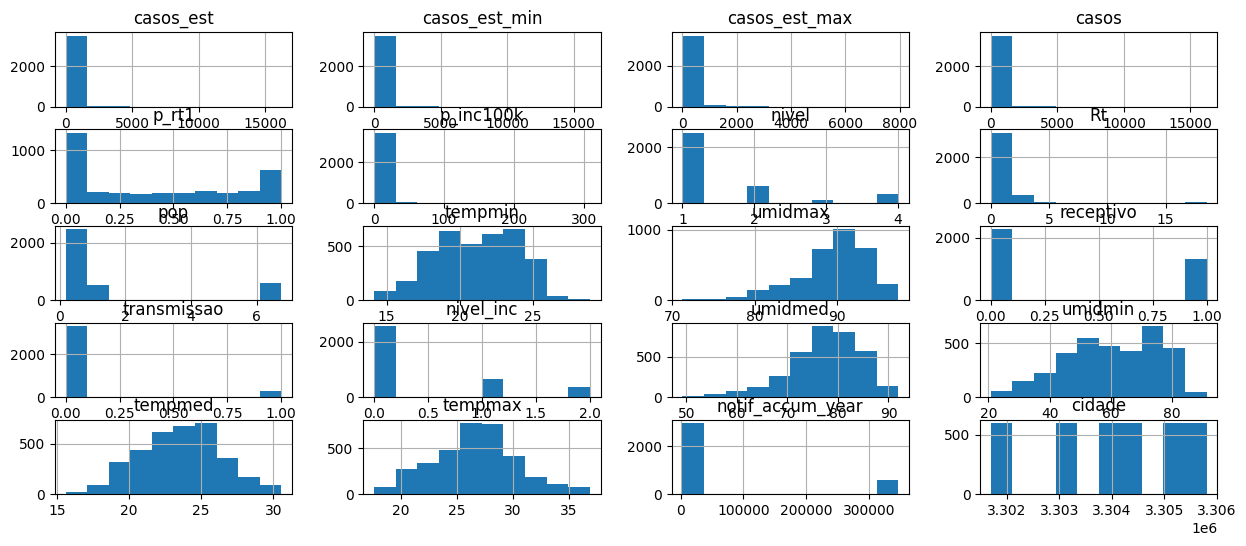

In [27]:
#Verificando se existem muito outlier no dataframe concatenando,
#pois ja entendi que os missings são semana especificas iguais em todas as cidades que consumi da API

df_dados_01.hist(figsize=(15,6))

O  tratamento dos missings dos atributos será realizado com a função .....
que utilizarei a media para adicionar valores e posteriormente geral graficos e analises.

In [28]:
# Instanciando uma nova variavel com o missings tratados com a media dos atributos.
#Utilizarei a função lambda para todas as colunas
#df_dados_01.mean(axis=0,skipna=True,numeric_only=True)

#Selecionar somente as colunas numericas
#df_colunas_numericas = df_dados_01.select_dtypes(include=[np.number])

#aplicando a função lambda para transformar o missings nos valores da media
#df_colunas_tratada = df_colunas_numericas.apply(lambda x: x.fillna(df_colunas_numericas.median()),axis=0)

#Criar um for para substituir a coluna tratada

#for coluna in df_colunas_numericas.columns:
#  df_dados_01[coluna] = df_colunas_numericas[coluna]

#df_dados_01.isna().sum()

#Substituindo os valores nulos pela median dos valores

df_dados_01['umidmax'] = df_dados_01['umidmax'].fillna(df_dados_01['umidmax'].median(),axis=0)

df_dados_01['umidmed'] =  df_dados_01['umidmed'].fillna(df_dados_01['umidmed'].median(),axis=0)

df_dados_01['umidmin'] =  df_dados_01['umidmin'].fillna(df_dados_01['umidmin'].median(),axis=0)

df_dados_01['tempmed'] = df_dados_01['tempmed'].fillna(df_dados_01['tempmed'].median(),axis=0)

df_dados_01['tempmax'] = df_dados_01['tempmax'].fillna(df_dados_01['tempmax'].median(),axis=0)

df_dados_01.isna().sum()

data_iniSE          0
casos_est           0
casos_est_min       0
casos_est_max       6
casos               0
p_rt1               0
p_inc100k           0
nivel               0
Rt                  0
pop                 0
tempmin             0
umidmax             0
receptivo           0
transmissao         0
nivel_inc           0
umidmed             0
umidmin             0
tempmed             0
tempmax             0
notif_accum_year    0
cidade              0
dtype: int64

In [29]:
#Tratar os valores Maximo que estão com missigns como '0'

df_dados_01['casos_est_max'] = df_dados_01['casos_est_max'].fillna(0)


In [30]:
#Dataframe limpo
df_dados_01.isna().sum()

data_iniSE          0
casos_est           0
casos_est_min       0
casos_est_max       0
casos               0
p_rt1               0
p_inc100k           0
nivel               0
Rt                  0
pop                 0
tempmin             0
umidmax             0
receptivo           0
transmissao         0
nivel_inc           0
umidmed             0
umidmin             0
tempmed             0
tempmax             0
notif_accum_year    0
cidade              0
dtype: int64

In [31]:
#Transformando a coluna abaixo no formato datatime
df_dados_01['data_iniSE'] = pd.to_datetime(df_dados_01['data_iniSE'])

In [32]:
#criando um dataframe com index como data ( Series temporais)
df_dados_02 = df_dados_01

#Setando o atributo 'data_iniSE' com indice para criar um serie temporal
df_dados_02.set_index('data_iniSE', inplace=True)

# Analise exploratória

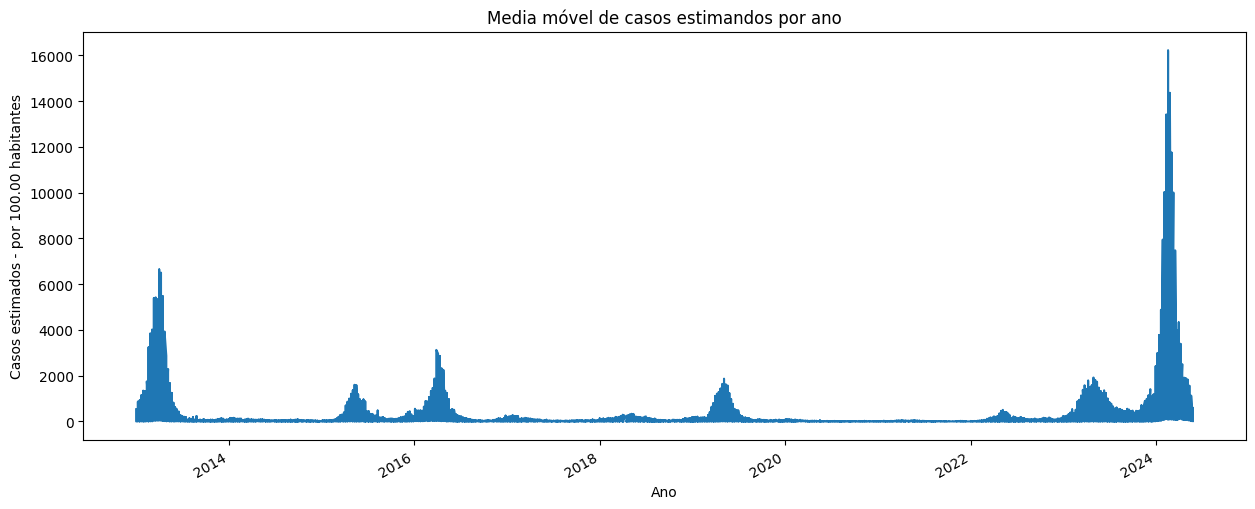

In [33]:
#1. Qual foi a média do número estimado de casos ao longo de 10 anos ?


#Calculando a media e saltando por um index
df_dados_02.rolling(window=1).casos_est.mean().plot(figsize=(15,6))
plt.title('Media móvel de casos estimandos por ano')
plt.xlabel('Ano')
plt.ylabel('Casos estimados - por 100.00 habitantes')
plt.show()


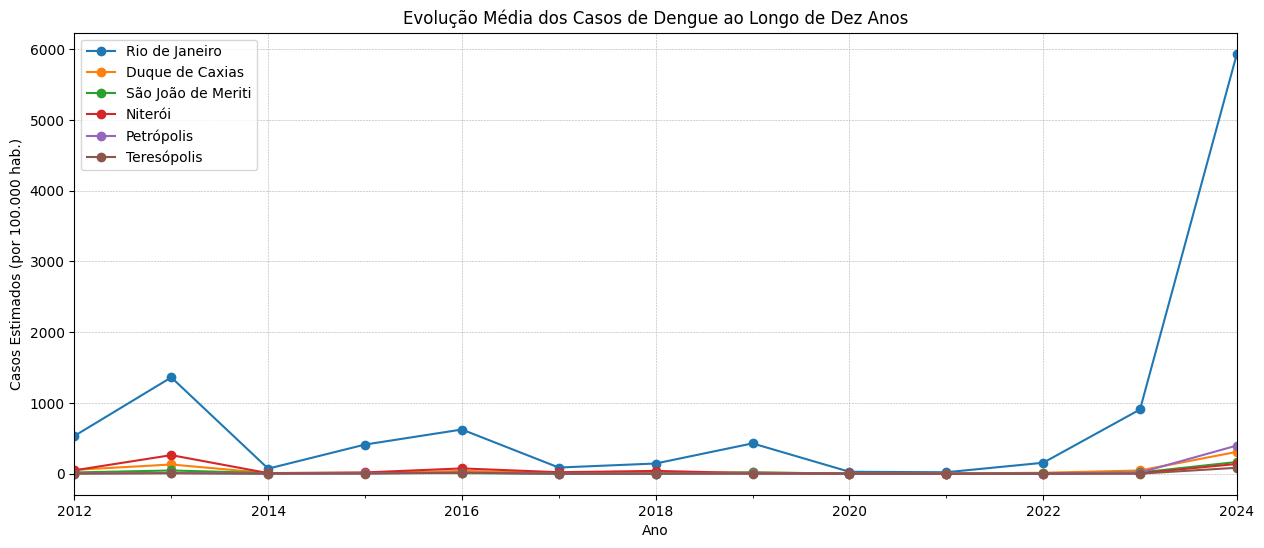

In [54]:
#2. Qual a evolução da media dos casos de dengue no periodo de 10 anos ?

# Filtrando por cidade
filtros_cidades = {
    'Rio de Janeiro': df_dados_02.cidade == 3304557,
    'Duque de Caxias': df_dados_02.cidade == 3301702,
    'São João de Meriti': df_dados_02.cidade == 3305109,
    'Niterói': df_dados_02.cidade == 3303302,
    'Petrópolis': df_dados_02.cidade == 3303906,
    'Teresópolis': df_dados_02.cidade == 3305802,
}

# Plotando os gráficos de cada cidade de forma independente
plt.figure(figsize=(15, 6))

for cidade, filtro in filtros_cidades.items():
    df_dados_02[filtro].casos.resample('Y').mean().plot(
        kind='line', label=cidade, marker='o', figsize=(15, 6)
    )

plt.title('Evolução Média dos Casos de Dengue ao Longo de Dez Anos')
plt.xlabel("Ano")
plt.ylabel("Casos Estimados (por 100.000 hab.)")
plt.legend()
plt.grid(visible=True, linestyle ='--', linewidth=0.4)
plt.savefig('rafico01.jpeg')
plt.show()


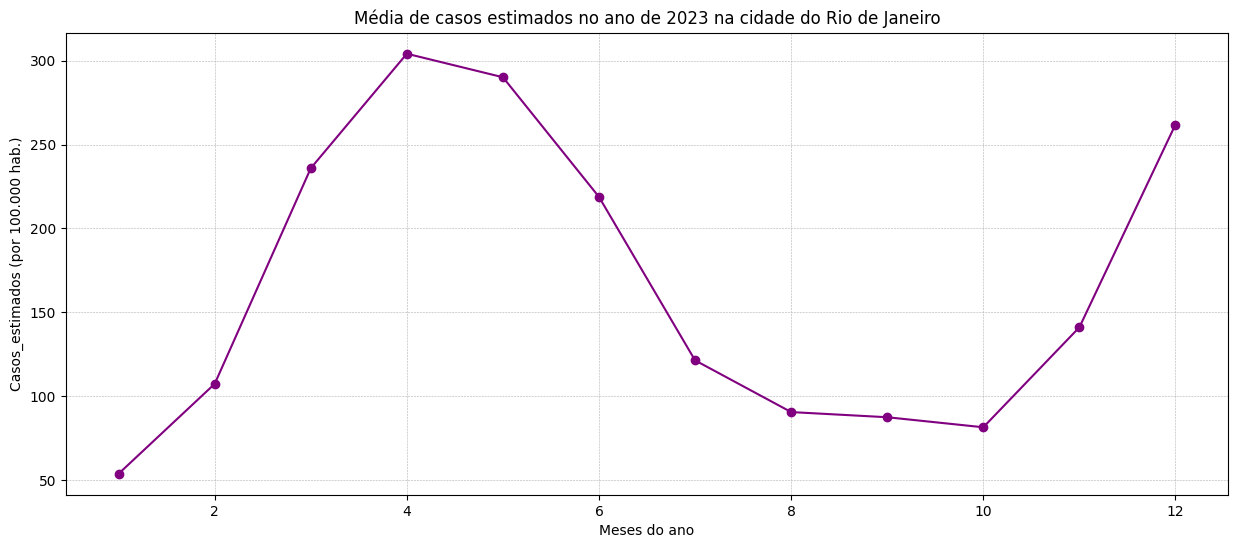

In [56]:
#1. Qual foi a média do número estimado de casos por mês ao longo do último ano na cidade do Rio de janeiro?
#(casos por 100.000 habitantes)
#Filtrando pelo ano de 2023
filtro_2023 = df_dados_02.index.year == 2023
#Plotando o grafico
df_dados_02[filtro_2023].casos_est.groupby(df_dados_02[filtro_2023].index.month).mean().plot(kind='line',marker='o',color='purple',figsize=(15,6))
plt.title('Média de casos estimados no ano de 2023 na cidade do Rio de Janeiro')
plt.xlabel('Meses do ano')
plt.ylabel('Casos_estimados (por 100.000 hab.)')
plt.grid(visible=True, linestyle ='--', linewidth=0.4)
plt.show()

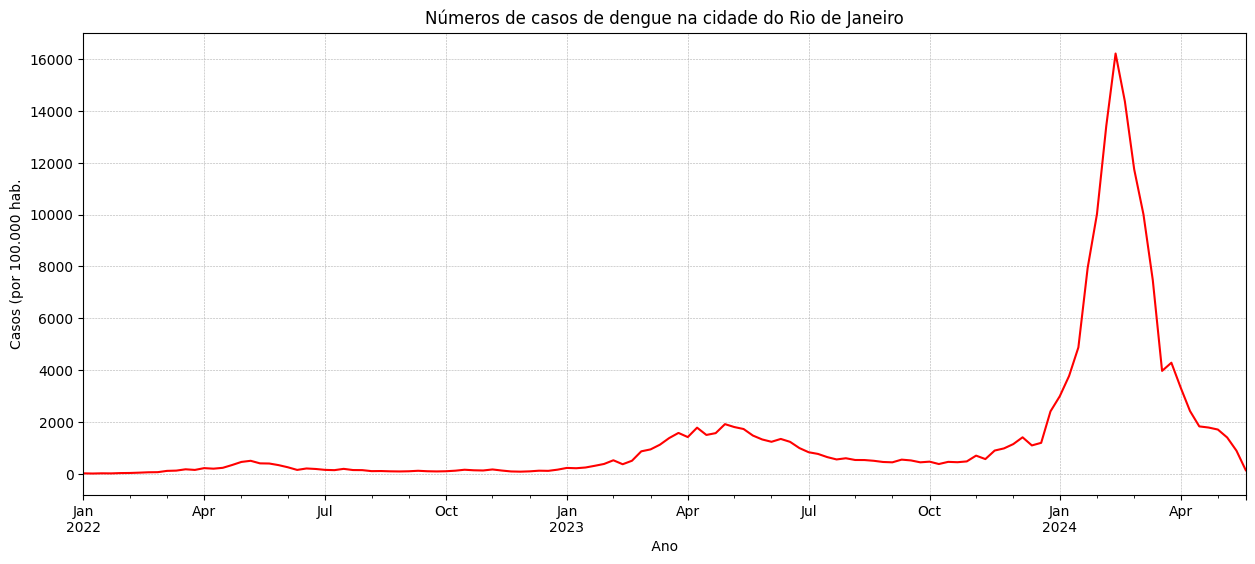

In [59]:
#1. Qual foi a média do número estimado de casos por ano ao longo dos dois ultimos anos.
#(casos por 100.000 habitantes)
#Filtrando pelo ano de 2023
filtro_2023_Rio_de_janeiro = (df_dados_02.index.year >= 2022) & (df_dados_02.cidade == 3304557)

#Plotando o graficos
#df_dados_02[filtro_2023_Rio_de_janeiro].rolling(window=1).casos.mean().plot(kind='line', color='red',figsize=(15,6))

df_dados_02[filtro_2023_Rio_de_janeiro].casos.plot(kind='line', color='red',figsize=(15,6))


plt.title('Números de casos de dengue na cidade do Rio de Janeiro')
plt.xlabel(' Ano ')
plt.ylabel('Casos (por 100.000 hab.')
plt.grid(visible=True, linestyle ='--', linewidth=0.4)
plt.show()